In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split , cross_val_score , validation_curve , GridSearchCV ,learning_curve , GroupKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder , LabelBinarizer , OneHotEncoder , OrdinalEncoder , MinMaxScaler , StandardScaler , RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.linear_model import SGDClassifier
from sklearn.impute import SimpleImputer, KNNImputer  # c'est pour enlever les valeur manquante
import seaborn as sns


In [2]:
# Charger le dataset depuis le fichier Excel
file_path = 'dataset.xlsx'
data = pd.read_excel(file_path)
#data.head()
# Afficher les premières lignes du dataset


In [3]:
df = data.copy()

In [4]:
df.shape #visualiser la taille de la matrice 

(5644, 111)

In [5]:
df.dtypes.value_counts() #comter_le_nombre_de_type_de_variable

float64    70
object     37
int64       4
Name: count, dtype: int64

<Axes: >

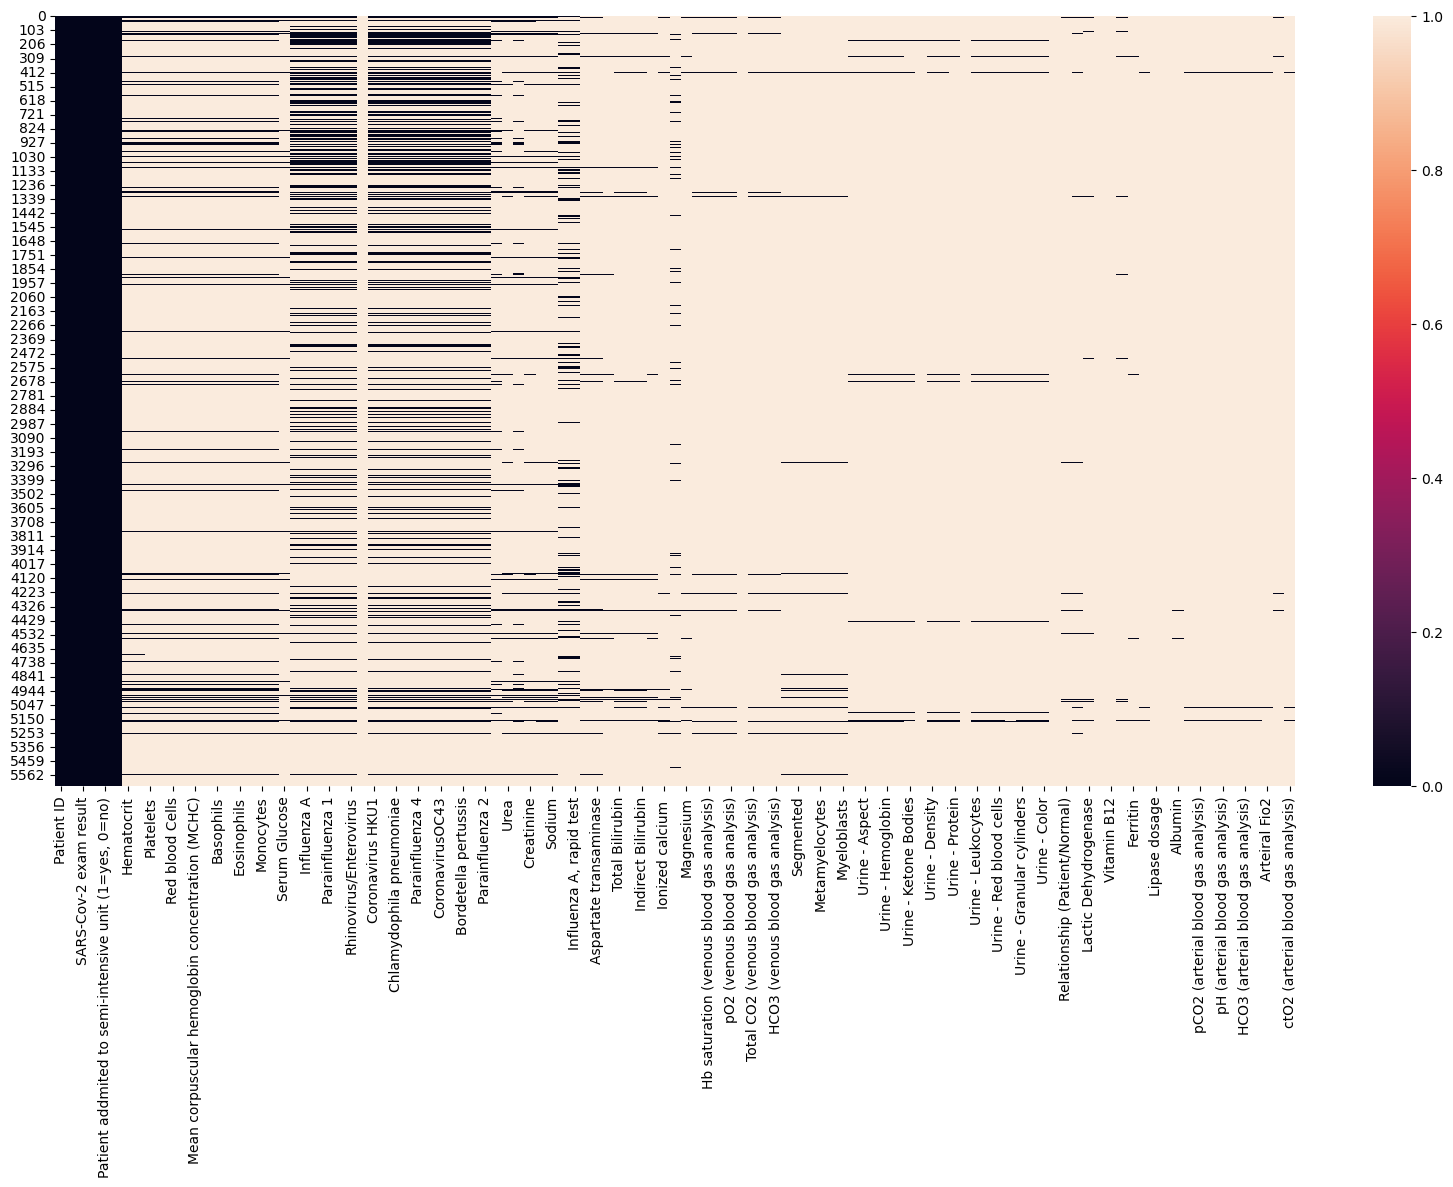

In [6]:
#affiche_valeur_maquante_sous_forme_image
plt.figure(figsize=(20,10))
sns.heatmap(df.isna())

In [7]:
#pourcentage_des_valeurs_manquantes_
df.isna().sum()/111

Patient ID                                                0.000000
Patient age quantile                                      0.000000
SARS-Cov-2 exam result                                    0.000000
Patient addmited to regular ward (1=yes, 0=no)            0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)     0.000000
                                                           ...    
HCO3 (arterial blood gas analysis)                       50.603604
pO2 (arterial blood gas analysis)                        50.603604
Arteiral Fio2                                            50.666667
Phosphor                                                 50.666667
ctO2 (arterial blood gas analysis)                       50.603604
Length: 111, dtype: float64

In [8]:
df.columns[df.isna().sum()/111 < 0.9] #selectionner tous les colonnes dont les valeur manquante est > a 90

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)'],
      dtype='object')

In [9]:
df = df[df.columns[df.isna().sum()/df.shape[0] < 0.9]]

In [10]:
df.shape

(5644, 39)

In [11]:
df = df

In [16]:
df['SARS-Cov-2 exam result'].value_counts()

SARS-Cov-2 exam result
negative    5086
positive     558
Name: count, dtype: int64

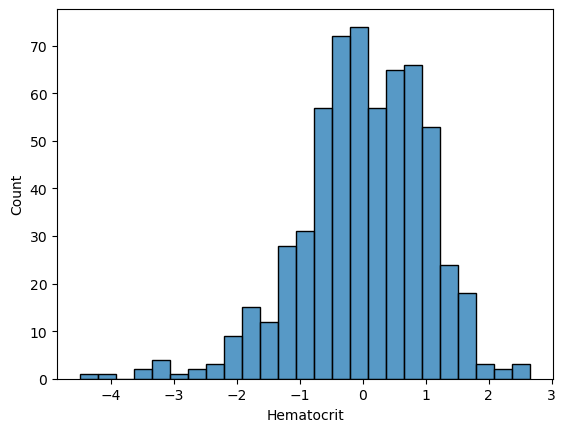

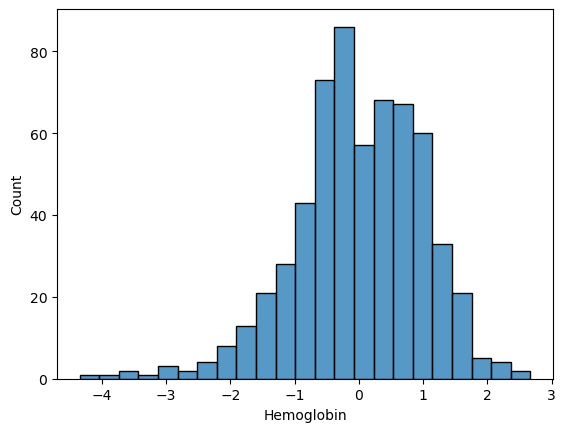

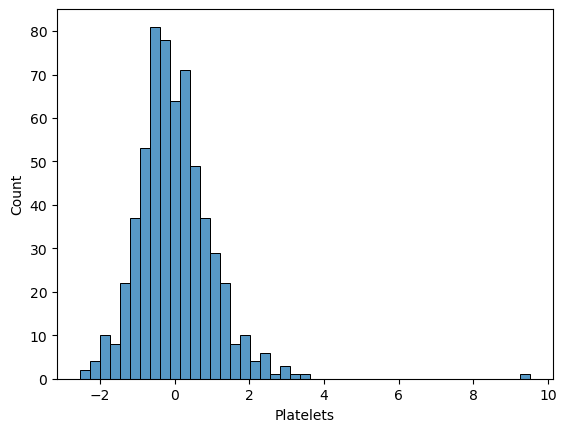

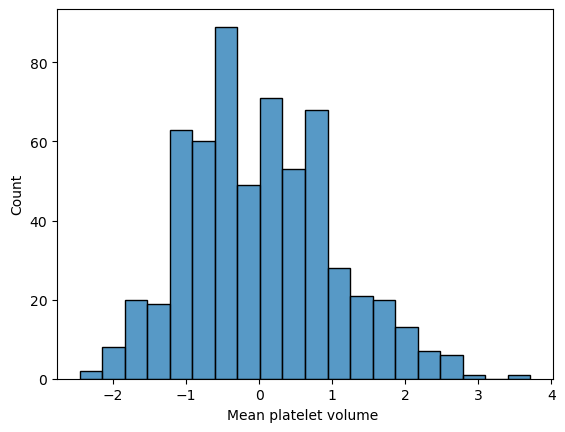

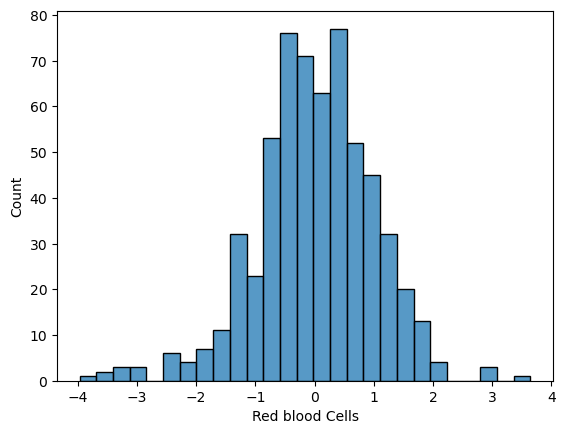

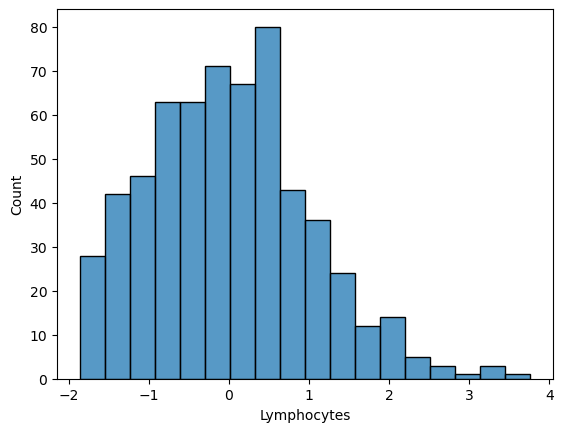

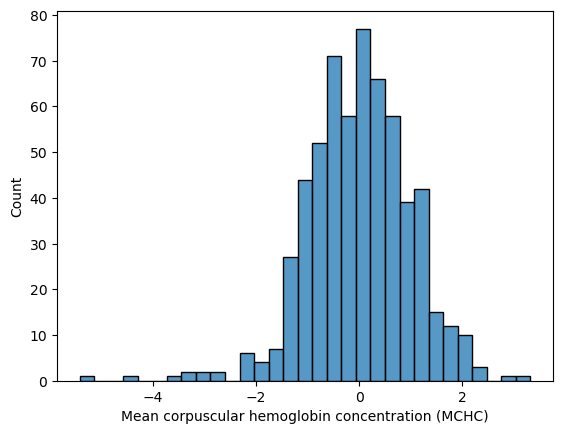

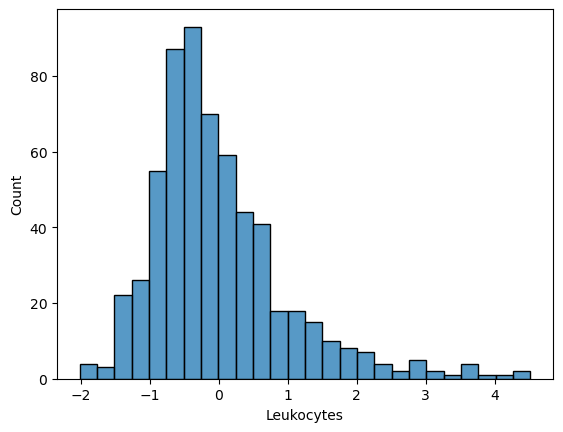

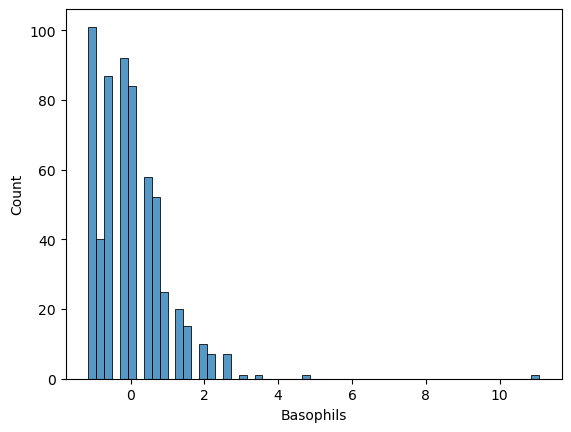

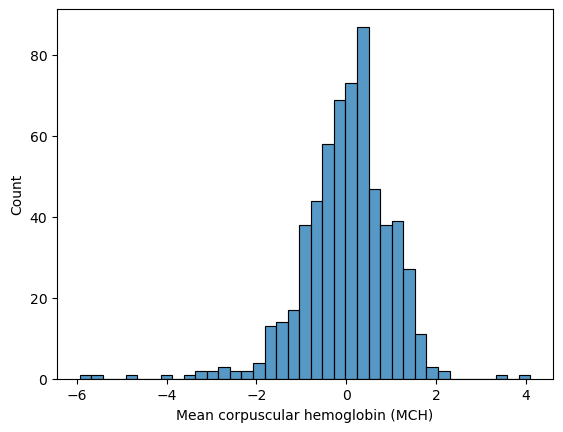

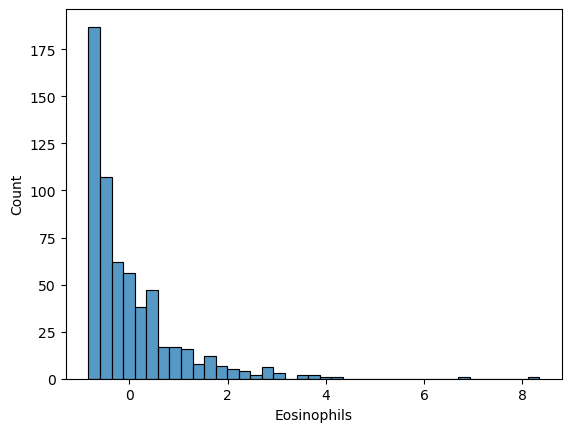

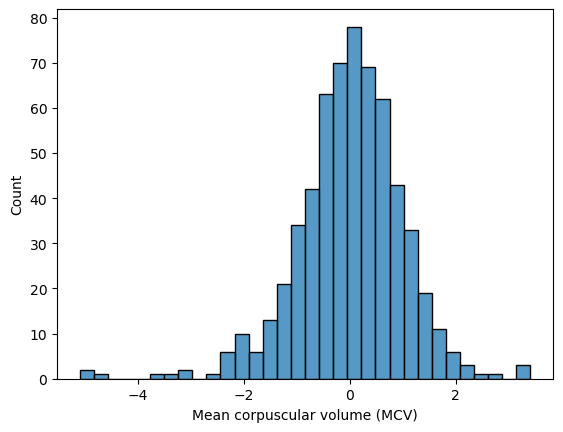

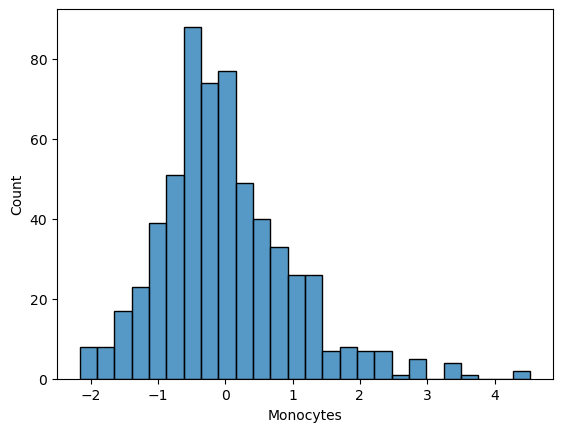

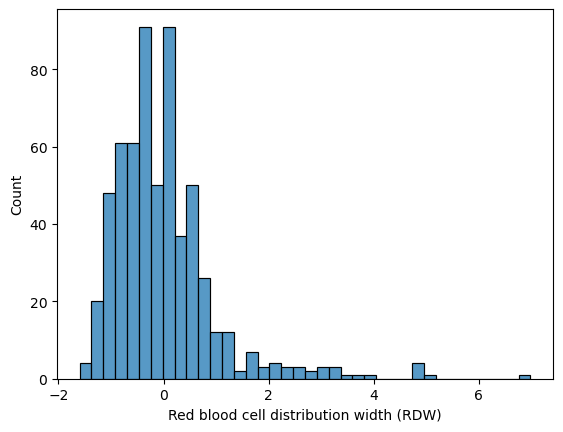

In [19]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.histplot( df[col] )

<Axes: xlabel='Patient age quantile', ylabel='Count'>

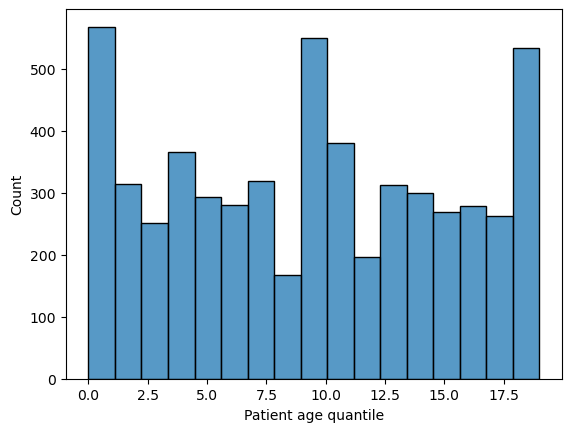

In [21]:
sns.histplot( df['Patient age quantile'] )

In [27]:
#for col in df.select_dtypes('object'):
    #plt.figure()
    #df[col].value_counts().plot.pie()

### Relation Target / Variable 